Dataset summary:
|Dataset|Observations|Variables|Description|
|:---|:---|:---|:---|
|players.csv|196|7|A list of all unique players, including data about each player.| 
|sessions.csv|1535|5|A list of individual play sessions by each player, including data about the session.|

Dataset players.csv summary:
|Variable name|Type|Description|Example|Issues|
|:---|:---|:---|:---|:---|
|experience|Character|The player’s Minecraft experience level.|Pro|    |
|subscribe|Logical|Whether the player subscribes or not.|TRUE|   |
|hashedEmail|Character|The player's identifier.|f6daba4...|It is not relevant to this project.|
|played_hours|Numeric|The palyer's total playtime (in hours).|30.3|   |
|name|Character|The player’s username.|Morgan|It is not relevant to this project.|
|gender|Character|The player's gender.|Male|Some players do not provide their gender information.|
|Age|Numeric|The player's age (in years).|9|Some players do not provide their age information.|

Dataset sessions.csv summary:
|Variable Name|Type|Description|Example|Issues|
|:---|:---|:---|:---|:----|
|hashedEmail|Character|The player's identifier.|bfce39c...|It is not relevant to this project.|
|start_time|Character|The time that the player starts the game.|30/06/2024 18:12|Need conversion before using the data.|
|end_time|Character|The time that the player ends the game.|30/06/2024 18:24|Some data is missing.|
|original_start_time|Numeric|The original time that the player starts the game.|1.71977e+12|Need conversion before using the data.|
|original_end_time| Numeric|The original time that the player ends the game.|1.71977e+12|Some data is missing.|

Summary statistics:
|Variable|Mean|Min|Max|
|:---|:---|:---|:---|
|played_hours|11.71|0.00|203.10|
|Age|20.45|8.00|68.00|
|original_start_time|1.720×10^12|1.711×10^12|1.729×10^12|
|original_end_time|1.720×10^12|1.711×10^12|1.729×10^12|

Broad question (question 2): We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specific question: Can a player's Minecraft experience level, gender and age predict the player's total playtime?

To address this question, dataset players.csv is required because total playtime, experience level, gender, and age are all included in this dataset. Total playtime is a quantitative outcome for regression methods, while experience level, gender, and age serve as predictor variables. To prepare the data for modeling, I will first convert experience and gender into categorical factors. Then I remove the observations with missing data. After wrangling the data to ensure it is in tidy form, apply predictive methods to it.

In [28]:
library(tidyverse)

players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [26]:
players <- players |>
  mutate(gender = as_factor(gender), experience = as_factor(experience))

players_means <- players |>
  select(played_hours, Age) |>
  summarise(across(played_hours:Age, mean, na.rm = TRUE)) |>
  pivot_longer(cols = played_hours:Age,
               names_to = "Variable",
               values_to = "Mean")
players_means

Variable,Mean
<chr>,<dbl>
played_hours,5.845918
Age,21.139175


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


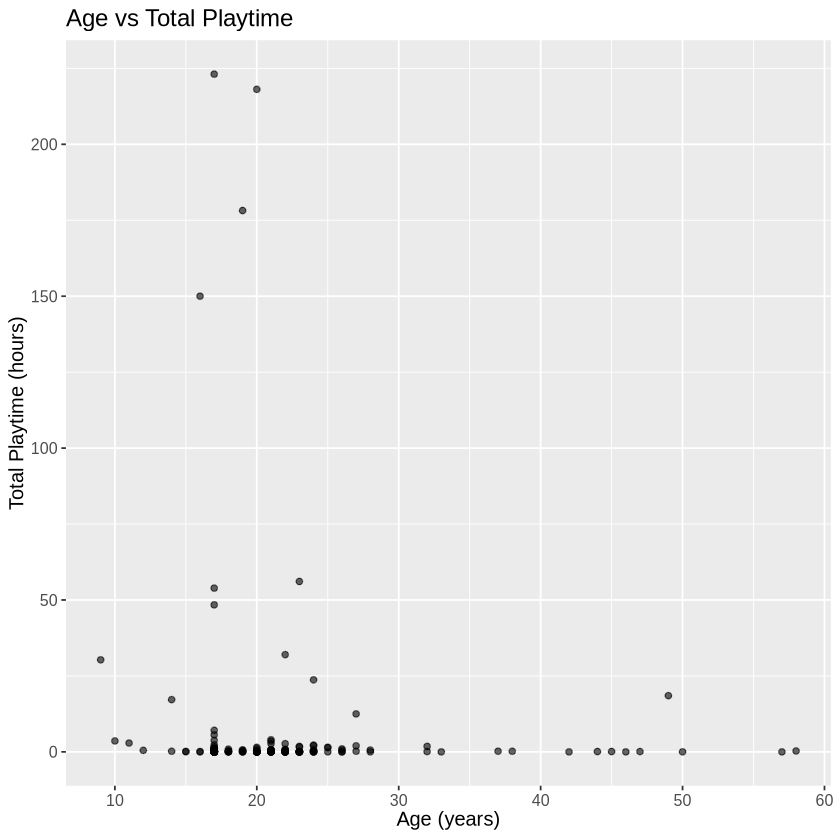

In [18]:
age <- players |>
  ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(title = "Age vs Total Playtime",
       x = "Age (years)",
       y = "Total Playtime (hours)") +
  theme(text = element_text(size = 12))
age

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


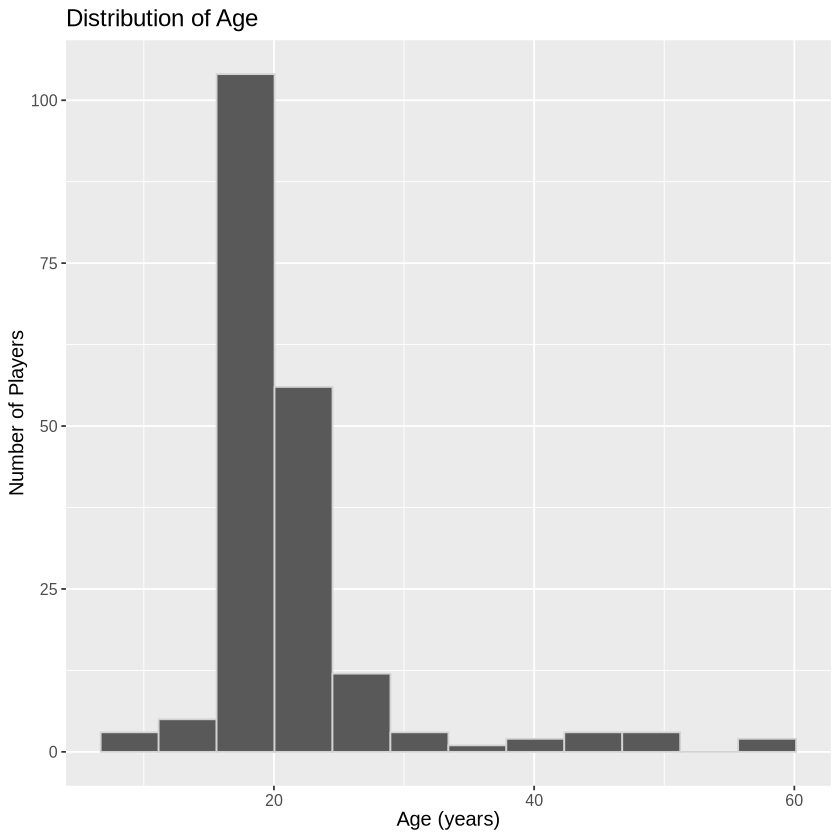

In [23]:
age_distribution <- players |>
  ggplot(aes(x = Age)) +
  geom_histogram(color = "lightgrey", bins = 12) +
  labs(title = "Distribution of Age",
       x = "Age (years)",
       y = "Number of Players") +
  theme(text = element_text(size = 12))
age_distribution

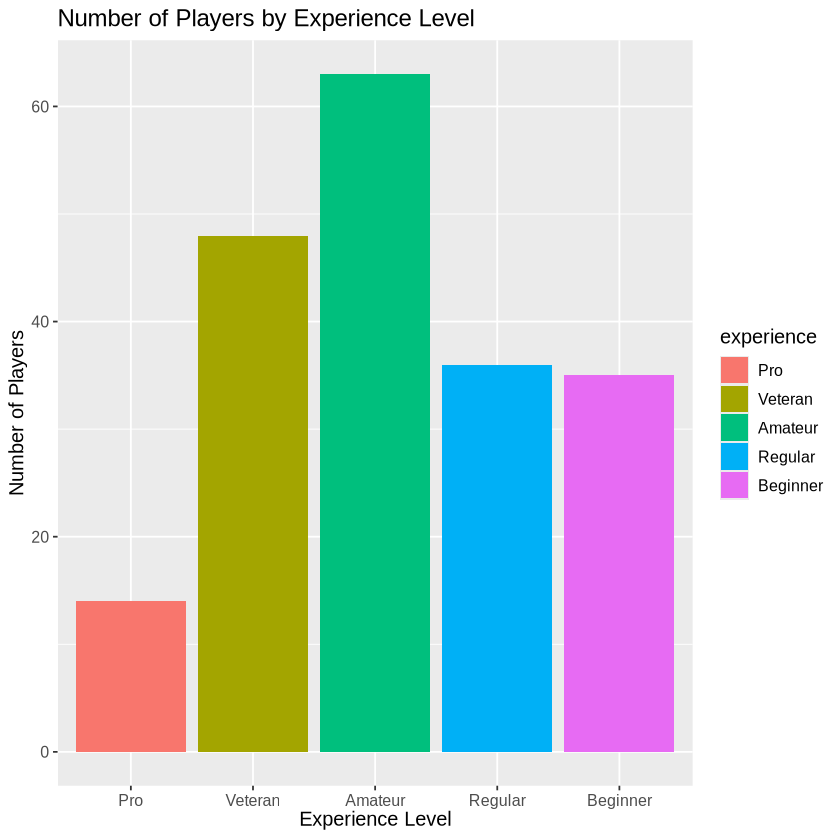

In [25]:
experience_count <- players |>
  group_by(experience) |>
  summarise(count = n())

experience <- ggplot(experience_count, aes(x = experience, y = count, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Players by Experience Level",
    x = "Experience Level",
    y = "Number of Players") +
   theme(text = element_text(size = 12))
experience

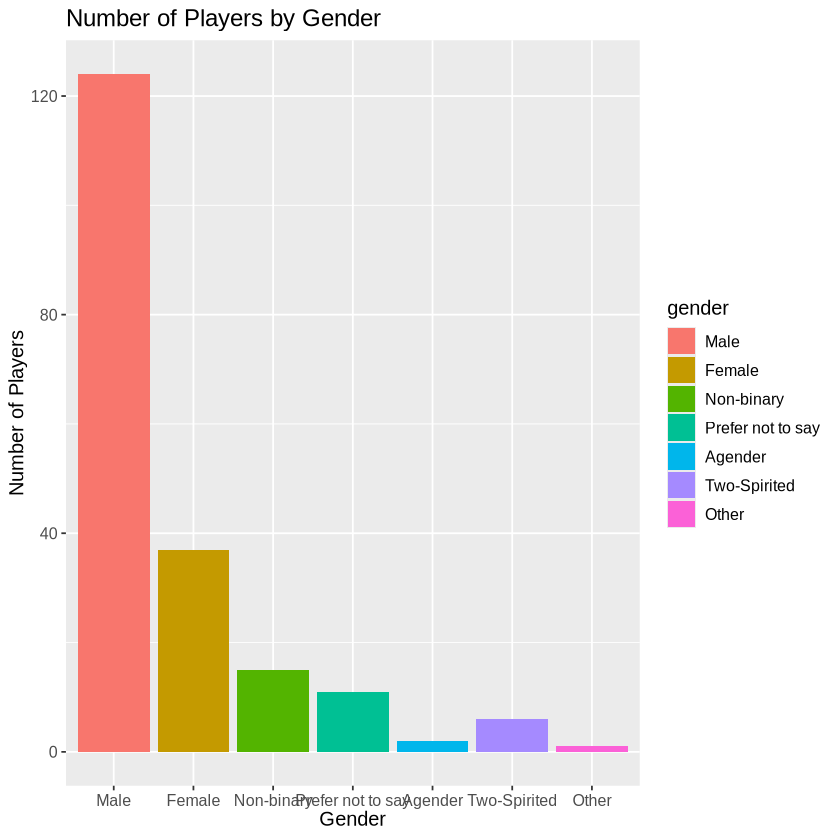

In [24]:
gender_count <- players |>
  group_by(gender) |>
  summarise(count = n())

gender <- ggplot(gender_count, aes(x = gender, y = count, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Players by Gender",
    x = "Gender",
    y = "Number of Players") +
   theme(text = element_text(size = 12))
gender

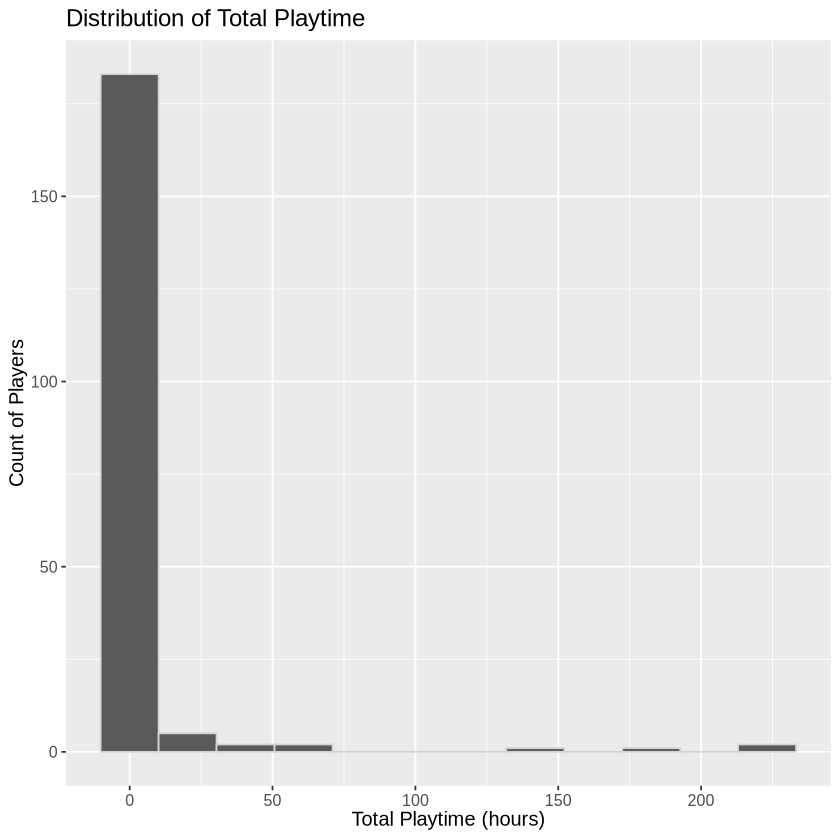

In [21]:
playtime <- players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(color = "lightgrey", bins = 12) +
  labs(title = "Distribution of Total Playtime",
       x = "Total Playtime (hours)",
       y = "Number of Players") +
  theme(text = element_text(size = 12))
playtime

Based on the exploratory visualizations, age may not be a strong potential predictor of total playtime, because the scatterplot of age versus total playtime shows a weak relationship. The age distribution is concentrated among young players around 20 years old. The bar plot of experience levels shows substantial variation across categories, suggesting that players differ in their experience. Although the bar plot of gender shows differences in sample sizes across gender categories, it is still concentrated among male players overall. Finally, the distribution of total playtime shows that most players have low playtime, and only a small number of people play extensively.

I will use multivariable linear regression as the primary predictive method. This method is appropriate because the outcome variable (total playtime) is quantitative and continuous. Multivariable linear regression allows us to examine how more than one predictor (experience, gender, and age) relate to the response while controlling for one another. Applying this method requires several assumptions. For instance, we assume that each predictor has a linear relationship with total playtime. The data points are independent from one another. A potential limitation is that linear regression struggles to capture non-linear or interactive relationships among experience, age, and playtime. The model may not work well if these occur.

To ensure the model works well, I will compare it against other alternative predictive models, such as k-nearest neighbours regression, using performance metrics (RMSE and RMSPE). I will also split the data into the training and test sets, dividing the dataset into 75% training and 25% testing data. Split should happen before any modeling, but after all wrangling steps that are not dependent on the model. Within the training data, I will use cross-validation, such as 5-fold cross-validation, when tuning competing models to obtain more stable performance estimates. This process ensures that we can get a better estimate of accuracy, which will lead to a more reliable choice of the best model for predicting total playtime.